从txt里面提取出 locus tag    old locus tag symbol product

In [1]:
import pandas as pd
df_original = pd.read_csv('GeneSpecificInformation_USA300_FPR3757.tsv', delimiter='\t', nrows = 3000)
# df_original = pd.read_csv('GeneSpecificInformation_USA300_FPR3757.tsv', delimiter='\t')
print(type(df_original))
df = pd.DataFrame(df_original, columns=['locus tag', 'old locus tag', 'symbol', 'product'])
df

<class 'pandas.core.frame.DataFrame'>


,locus tag,old locus tag,symbol,product
0,SAUSA300_RS00010,SAUSA300_0001,SAUSA300_RS00010,chromosomal replication initiator protein DnaA
1,SAUSA300_RS00015,SAUSA300_0002,SAUSA300_RS00015,DNA polymerase III subunit beta
2,SAUSA300_RS00020,SAUSA300_0003,SAUSA300_RS00020,RNA-binding protein
3,SAUSA300_RS00025,SAUSA300_0004,SAUSA300_RS00025,DNA replication and repair protein RecF
4,SAUSA300_RS00030,SAUSA300_0005,SAUSA300_RS00030,DNA gyrase subunit B
...,...,...,...,...
2995,SAUSA300_RS14605,SAUSA300_2629,SAUSA300_RS14605,DNA-binding protein
2996,SAUSA300_RS14610,SAUSA300_2630,SAUSA300_RS14610,nickel transporter NixA
2997,SAUSA300_RS14615,SAUSA300_2631,SAUSA300_RS14615,arylamine N-acetyltransferase
2998,SAUSA300_RS14620,SAUSA300_2632,SAUSA300_RS14620,membrane protein


In [2]:
# 删掉最后一行
df.drop(df.tail(1).index,inplace=True)
df

,locus tag,old locus tag,symbol,product
0,SAUSA300_RS00010,SAUSA300_0001,SAUSA300_RS00010,chromosomal replication initiator protein DnaA
1,SAUSA300_RS00015,SAUSA300_0002,SAUSA300_RS00015,DNA polymerase III subunit beta
2,SAUSA300_RS00020,SAUSA300_0003,SAUSA300_RS00020,RNA-binding protein
3,SAUSA300_RS00025,SAUSA300_0004,SAUSA300_RS00025,DNA replication and repair protein RecF
4,SAUSA300_RS00030,SAUSA300_0005,SAUSA300_RS00030,DNA gyrase subunit B
...,...,...,...,...
2994,SAUSA300_RS14600,SAUSA300_2628,SAUSA300_RS14600,protein RarD
2995,SAUSA300_RS14605,SAUSA300_2629,SAUSA300_RS14605,DNA-binding protein
2996,SAUSA300_RS14610,SAUSA300_2630,SAUSA300_RS14610,nickel transporter NixA
2997,SAUSA300_RS14615,SAUSA300_2631,SAUSA300_RS14615,arylamine N-acetyltransferase


In [3]:
# df['locus tag'].count()
df['symbol'].count()
# df['symbol']

2999

In [4]:
# product去重
distinct_product = df['product'].unique()
distinct_product

array(['chromosomal replication initiator protein DnaA',
       'DNA polymerase III subunit beta', 'RNA-binding protein', ...,
       'protein RarD', 'nickel transporter NixA',
       'arylamine N-acetyltransferase'], dtype=object)

In [5]:
# product去重了计数
len(distinct_product)

1557

In [6]:
product_count = df.groupby('product')['product'].agg(['count'])
product_count
# print(type(df))

,count
product,
(deoxy)nucleoside triphosphate pyrophosphohydrolase,1
"1,4-dihydroxy-2-naphthoate octaprenyltransferase",1
"1,4-dihydroxy-2-naphthoyl-CoA synthase",1
1-(5-phosphoribosyl)-5-((5- phosphoribosylamino)methylideneamino)imidazole-4- carboxamide isomerase,1
1-acyl-sn-glycerol-3-phosphate acyltransferase,1
...,...
zinc metallopeptidase,1
zinc metalloprotease,1
zinc ribbon domain-containing protein,1


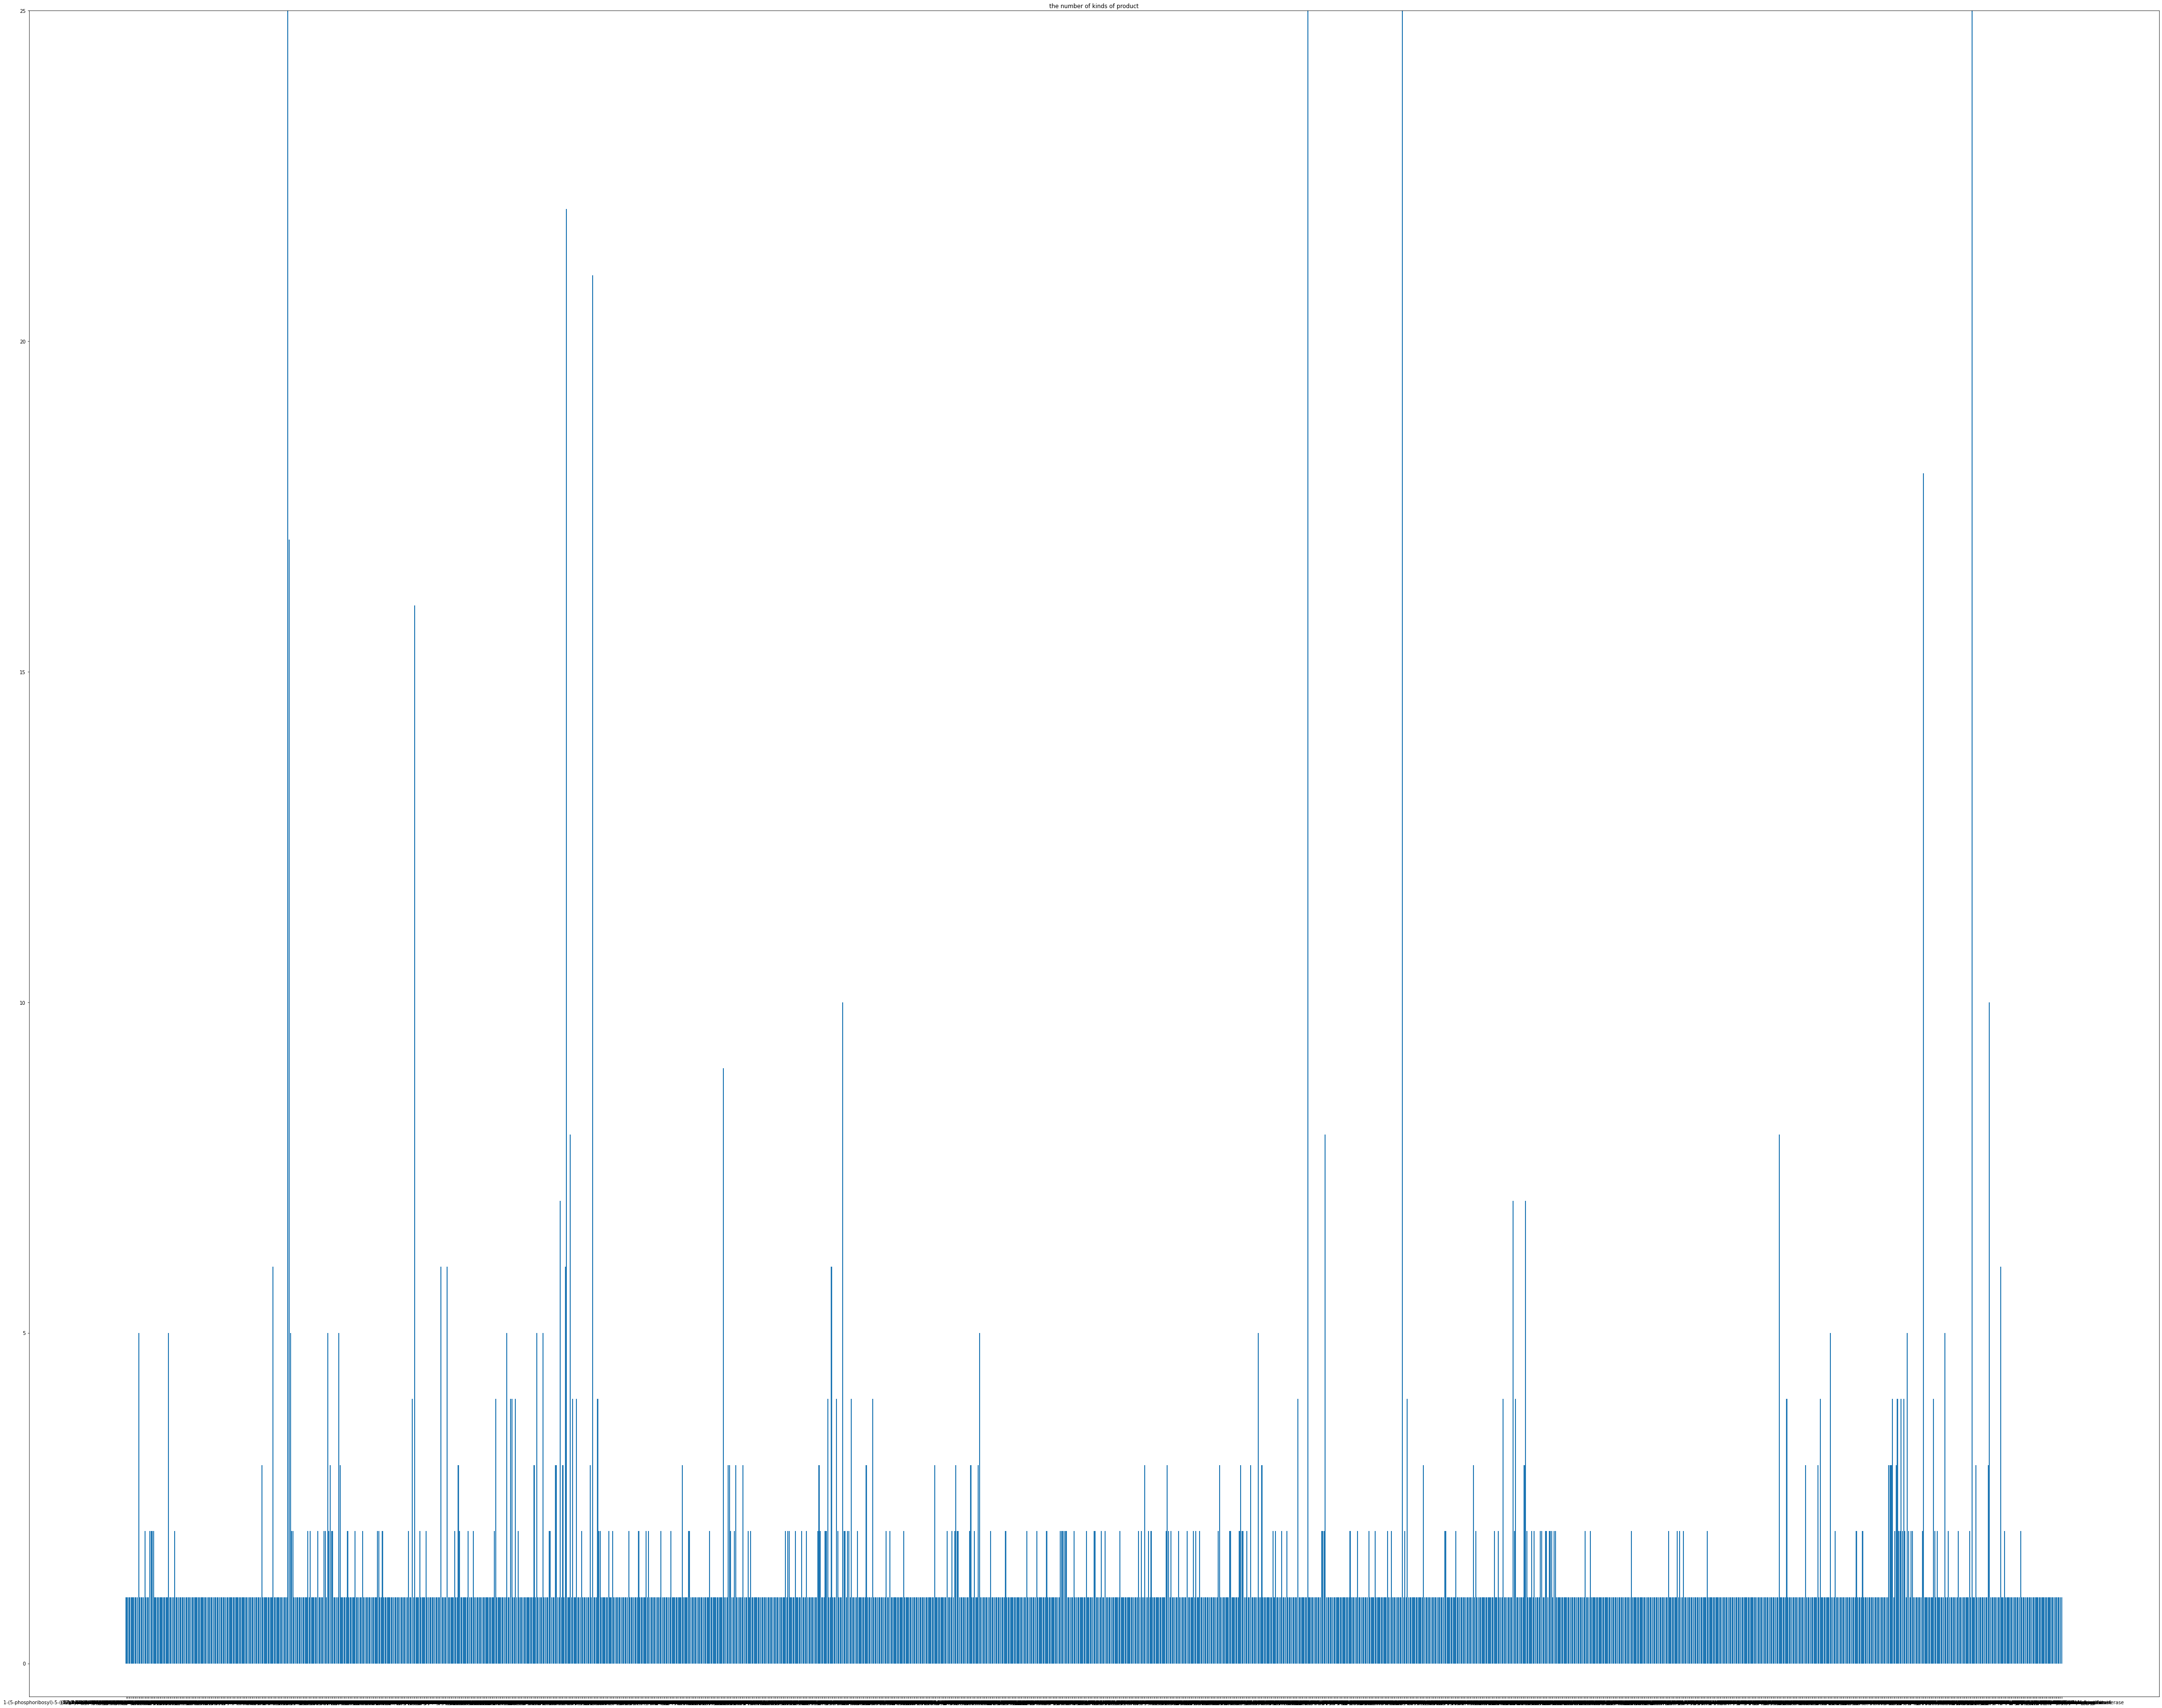

In [7]:
# 画图
%matplotlib inline
import matplotlib.pyplot as plt

result = product_count.reset_index(drop=False)

# 生成一个画布并指定画布大小，默认为640*480（传参的时候要除以100）
plt.figure(figsize = (80, 65))
axes = plt.axes()
axes.set_ylim([-0.5, 25])
plt.bar(result['product'], result['count'])
plt.title('the number of kinds of product')
plt.show()

In [9]:
type(result)

pandas.core.frame.DataFrame